# **8.1 Text Analysis**

#### **텍스트 분류 (Text Classification)**:

Describes the process of predicting the category to which a document belongs. For example, it can automatically classify news articles into categories such as politics, society, or culture, or identify spam emails. This method applies supervised learning techniques.

#### **감성 분석 (Sentiment Analysis)**:

Focuses on analyzing emotions, judgments, beliefs, opinions, and moods in text. It's used in various areas like social media sentiment analysis, reviews of products or movies, and opinion polling. It can be applied using both supervised and unsupervised learning techniques.

#### **텍스트 요약 (Summarization)**:

Refers to the technique of extracting key themes or central ideas from text. This includes methods such as Topic Modeling, which is commonly used for this purpose.

#### **텍스트 군집화와 유사도 측정 (Text Clustering and Similarity Measurement)**:

Describes the process of clustering similar types of documents, which can be used in unsupervised learning approaches for text classification. Similarity measurement methods are also used to group documents based on their resemblance to one another.

텍스트는 비정형 데이터로, 머신러닝 알고리즘은 숫자형의 피처기반 데이터만 입력받는다.

따라서, 텍스트에서 피쳐를 추출하고 의미를 부여하는게 중요하다.

text에서 feature를 뽑아내는것을 feature vectorization이라고 한다. 보통 단어를 특징으로 한다.  



# **8.2 Text Preprocessing**

**NLTK(Natural Language Toolkit for Python)**

현재는 대량의 데이터 기반에서는 속도가 느려서 사용되지 않는다.  

### **Text Tokenization**

##### **Sentence Tokenization**

In [1]:
from nltk import sent_tokenize
import nltk
# nltk.download('punkt_tab')

In [2]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room.  \
              You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
# sent_tokenize 문장을 자르는 함수. 개행문자가 아니라 . 기준으로 구분
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


##### **Word Tokenization**

In [3]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [4]:
from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # return list
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


##### **n-gram**

텍스트나 연설에서 N개의 연속적인 항목(문자, 음절, 단어 등)의 시퀀스

모든 단어를 토큰화하면 문맥적인 의미가 무시되기 때문에 이런 문제를 해결하는 시도

In [5]:
from nltk import ngrams

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)

all_ngrams = ngrams(words, 2)
ngrams = [ngram for ngram in all_ngrams]
print(ngrams)

[('The', 'Matrix'), ('Matrix', 'is'), ('is', 'everywhere'), ('everywhere', 'its'), ('its', 'all'), ('all', 'around'), ('around', 'us'), ('us', ','), (',', 'here'), ('here', 'even'), ('even', 'in'), ('in', 'this'), ('this', 'room'), ('room', '.')]


### **Delete Stopword**

Stopword : 분석에 큰 의미가 없는 단어. 제거 안하면 중요단어로 인식될 가능성이 있다.

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cailab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:40])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']


In [8]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


실제에서는 이렇게 할 필요는 없다. 함수하나면 끝이기 때문

### **Stemming & Lemmatization**

언어의 단어는 문법적인 요소에 따라 변화한다.  
work - worked - working....  
Stemming & Lemmatization은 단어의 원형을 찾는다.

Lemmatization이 품사를 기반해 찾아서 정확하고 오래걸린다.

In [9]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


기대와 다른 단어를 찾는 경우도 있다.

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cailab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

amuse amuse amuse
happy happy
fancy fancy


# **8.3 Bag of Words**

문서가 가지는 모든 단어를 일괄적으로 빈도 값을 부여해 피쳐값을 추출한다.  
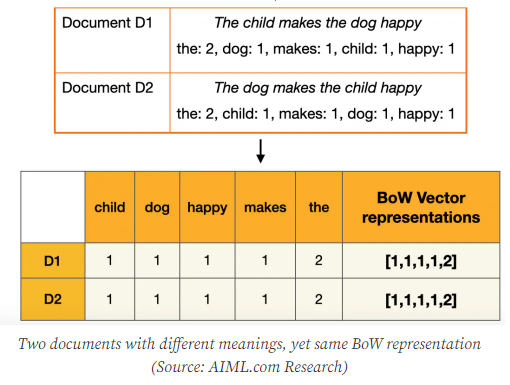

**장점**

구축이 쉽고 매우 빠르다.  

그리고 WORD2VEC이 압도적이라 그렇지 생각보다 문서의 특징을 잘 나타낸다.

**단점**

단순히 단어의 갯수만을 고려하므로 문맥을 반영하지 못한다.  

보통 없는 단어가 많아서 희소행렬이 만들어지며 이는 학습속도를 느려지게한다.

**BOW Feature Vectorization**

N개의 문서에서 M개의 단어를 추출하면 N X M의 행렬을 구성한다.

1. 카운트 기반의 벡터화 (나온 횟수만)는 특성상 사용하지 않는다.

2. TF-IDF는 문서에서만 나오는 고유한 단어에 가중치를 준다.

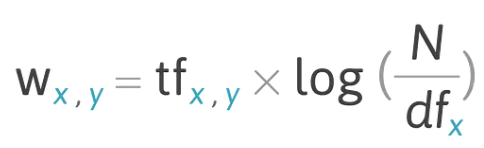

### **CountVectorizer**

In [12]:
text_sample_01 = 'The Matrix is everywhere its all around us, here even in this room. \
                  You can see it out your window or on your television. \
                  You feel it when you go to work, or go to church or pay your taxes.'
text_sample_02 = 'You take the blue pill and the story ends.  You wake in your bed and you believe whatever you want to believe\
                  You take the red pill and you stay in Wonderland and I show you how deep the rabbit-hole goes.'
text=[]
text.append(text_sample_01); text.append(text_sample_02)
print(text,"\n", len(text))

['The Matrix is everywhere its all around us, here even in this room.                   You can see it out your window or on your television.                   You feel it when you go to work, or go to church or pay your taxes.', 'You take the blue pill and the story ends.  You wake in your bed and you believe whatever you want to believe                  You take the red pill and you stay in Wonderland and I show you how deep the rabbit-hole goes.'] 
 2


### **Feature Vectorization (CountVectorizer)**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()
cnt_vect.fit(text)

CountVectorizer()

In [14]:
cnt_vect.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [15]:
ftr_vect = cnt_vect.transform(text)

In [16]:
print(type(ftr_vect), ftr_vect.shape)
print(ftr_vect)

# 1번 항목은 문서, 2번 항목은 단어에 부여된 인덱스

<class 'scipy.sparse._csr.csr_matrix'> (2, 51)
  (0, 0)	1
  (0, 2)	1
  (0, 6)	1
  (0, 7)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	2
  (0, 15)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	2
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	3
  (0, 25)	1
  (0, 26)	1
  (0, 30)	1
  (0, 31)	1
  (0, 36)	1
  (0, 37)	1
  (0, 38)	1
  (0, 39)	1
  (0, 40)	2
  :	:
  (1, 1)	4
  (1, 3)	1
  (1, 4)	2
  (1, 5)	1
  (1, 8)	1
  (1, 9)	1
  (1, 14)	1
  (1, 16)	1
  (1, 17)	1
  (1, 18)	2
  (1, 27)	2
  (1, 28)	1
  (1, 29)	1
  (1, 32)	1
  (1, 33)	1
  (1, 34)	1
  (1, 35)	2
  (1, 38)	4
  (1, 40)	1
  (1, 42)	1
  (1, 43)	1
  (1, 44)	1
  (1, 47)	1
  (1, 49)	7
  (1, 50)	1


In [17]:
print(cnt_vect.vocabulary_)

{'the': 38, 'matrix': 22, 'is': 19, 'everywhere': 11, 'its': 21, 'all': 0, 'around': 2, 'us': 41, 'here': 15, 'even': 10, 'in': 18, 'this': 39, 'room': 30, 'you': 49, 'can': 6, 'see': 31, 'it': 20, 'out': 25, 'your': 50, 'window': 46, 'or': 24, 'on': 23, 'television': 37, 'feel': 12, 'when': 45, 'go': 13, 'to': 40, 'work': 48, 'church': 7, 'pay': 26, 'taxes': 36, 'take': 35, 'blue': 5, 'pill': 27, 'and': 1, 'story': 34, 'ends': 9, 'wake': 42, 'bed': 3, 'believe': 4, 'whatever': 44, 'want': 43, 'red': 29, 'stay': 33, 'wonderland': 47, 'show': 32, 'how': 17, 'deep': 8, 'rabbit': 28, 'hole': 16, 'goes': 14}


In [18]:
cnt_vect = CountVectorizer(max_features=5, stop_words='english')
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse._csr.csr_matrix'> (2, 5)
{'window': 4, 'pill': 1, 'wake': 2, 'believe': 0, 'want': 3}


많이 나온단어 상위 5개

In [19]:
cnt_vect = CountVectorizer(ngram_range=(1,3))
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse._csr.csr_matrix'> (2, 201)
{'the': 129, 'matrix': 77, 'is': 66, 'everywhere': 40, 'its': 74, 'all': 0, 'around': 11, 'us': 150, 'here': 51, 'even': 37, 'in': 59, 'this': 140, 'room': 106, 'you': 174, 'can': 25, 'see': 109, 'it': 69, 'out': 90, 'your': 193, 'window': 165, 'or': 83, 'on': 80, 'television': 126, 'feel': 43, 'when': 162, 'go': 46, 'to': 143, 'work': 171, 'church': 28, 'pay': 93, 'taxes': 125, 'the matrix': 132, 'matrix is': 78, 'is everywhere': 67, 'everywhere its': 41, 'its all': 75, 'all around': 1, 'around us': 12, 'us here': 151, 'here even': 52, 'even in': 38, 'in this': 60, 'this room': 141, 'room you': 107, 'you can': 177, 'can see': 26, 'see it': 110, 'it out': 70, 'out your': 91, 'your window': 199, 'window or': 166, 'or on': 86, 'on your': 81, 'your television': 197, 'television you': 127, 'you feel': 179, 'feel it': 44, 'it when': 72, 'when you': 163, 'you go': 181, 'go to': 47, 'to work': 148, 'work or': 172, 'or go': 84, 'to church': 146, 

### **Sparse Matrix - COO**

In [20]:
import numpy as np

dense = np.array([[ 3, 0, 1 ], [0, 2, 0 ]])

In [21]:
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [22]:
print(type(sparse_coo))
print(sparse_coo)
dense01=sparse_coo.toarray()
print(type(dense01),"\n", dense01)

<class 'scipy.sparse._coo.coo_matrix'>
  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
<class 'numpy.ndarray'> 
 [[3 0 1]
 [0 2 0]]


### **Sparse Matrix - CSR**

In [23]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [24]:
print(sparse_csr)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


In [25]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)